In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate


In [2]:
dataset = pd.read_csv('Data/honey_purity_dataset.csv')


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [4]:
dataset.head(5) 

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [5]:
dataset.describe() 


,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [6]:
dataset.duplicated().sum()


0

In [7]:
dataset.isnull().sum(axis = 0)

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

In [8]:
dataset.describe(include=['object'])

,Pollen_analysis
count,247903
unique,19
top,Eucalyptus
freq,13194


In [9]:
def display_unique_values(df, column_name):
    pd.set_option('display.max_rows', None)

    value_counts = df[column_name].value_counts()

    unique_values_df = pd.DataFrame({
    'Unique_Values': value_counts.index,
    'Record_Count': value_counts.values
    })
    pd.reset_option('display.max_rows')

    print(unique_values_df)

In [10]:
display_unique_values(dataset, 'Pollen_analysis')


     Unique_Values  Record_Count
0       Eucalyptus         13194
1          Avocado         13191
2          Heather         13187
3            Thyme         13156
4        Sunflower         13148
5             Sage         13117
6        Blueberry         13106
7         Lavender         13086
8          Alfalfa         13049
9        Buckwheat         13036
10        Chestnut         13020
11      Wildflower         13016
12          Manuka         13003
13          Borage         13000
14  Orange Blossom         12992
15          Acacia         12976
16        Rosemary         12930
17          Clover         12910
18          Tupelo         12786


In [11]:
combined_aggregation = dataset.groupby('Pollen_analysis').agg({
    'Purity': ['mean', 'min', 'max'],  
})

combined_aggregation = combined_aggregation.sort_values(by=('Purity', 'mean'), ascending=False)

display(combined_aggregation)

Purity           
                     mean   min  max
Pollen_analysis                     
Sunflower        0.827422  0.61  1.0
Wildflower       0.826286  0.61  1.0
Heather          0.826279  0.61  1.0
Manuka           0.825376  0.61  1.0
Rosemary         0.824689  0.61  1.0
Buckwheat        0.824577  0.61  1.0
Borage           0.824468  0.61  1.0
Orange Blossom   0.824386  0.61  1.0
Avocado          0.824386  0.61  1.0
Alfalfa          0.824244  0.61  1.0
Lavender         0.824137  0.61  1.0
Thyme            0.824094  0.61  1.0
Eucalyptus       0.823987  0.61  1.0
Sage             0.823964  0.61  1.0
Blueberry        0.823778  0.61  1.0
Tupelo           0.823300  0.61  1.0
Clover           0.823283  0.61  1.0
Chestnut         0.823264  0.61  1.0
Acacia           0.822967  0.61  1.0

In [12]:
combined_aggregation = dataset.groupby('Pollen_analysis').agg({
    'Price': ['mean', 'min', 'max'],  
})
combined_aggregation = combined_aggregation.sort_values(by=('Price', 'mean'), ascending=False)

display(combined_aggregation)

Price                
                       mean     min     max
Pollen_analysis                            
Manuka           805.745622  595.49  976.69
Avocado          804.771376  595.49  976.69
Chestnut         795.422929  589.34  966.61
Blueberry        779.306635  577.05  946.46
Tupelo           770.561404  570.91  936.38
Heather          765.017065  564.76  926.30
Sage             762.868639  564.76  926.30
Thyme            754.726684  558.62  916.22
Sunflower        732.715551  540.18  885.99
Rosemary         622.343930  460.31  754.98
Borage           613.873783  454.17  744.91
Eucalyptus       571.978726  423.45  694.53
Buckwheat        564.114152  417.31  684.45
Lavender         497.412851  368.17  603.85
Acacia           446.981373  331.32  543.41
Alfalfa          356.417632  263.76  432.62
Wildflower       265.813135  196.23  321.85
Orange Blossom   207.136451  153.27  251.38
Clover           173.729015  128.72  211.13

In [13]:
def extract_boxplot_values(bp):
    medians = [item.get_ydata()[0] for item in bp['medians']]
    means = [item.get_ydata()[0] for item in bp['means']]
    minimums = [round(item.get_ydata()[0], 1) for item in bp['caps']][::2]
    maximums = [round(item.get_ydata()[0], 1) for item in bp['caps']][1::2]

    print('Exact values from boxplot:\n')
    print(f'Medians: {medians}\n'
          f'Means: {means}\n'
          f'Minimums: {minimums}\n'
          f'Maximums: {maximums}')

    boxplot_stats_array = []
    for median, mean, minimum, maximum in zip(medians, means, minimums, maximums):
        array = [median, mean, minimum, maximum]
        boxplot_stats_array.append(array)    
    print('\n')
    print(tabulate(boxplot_stats_array, headers=[ "Median", "Mean", "Minimum", "Maximum"]))

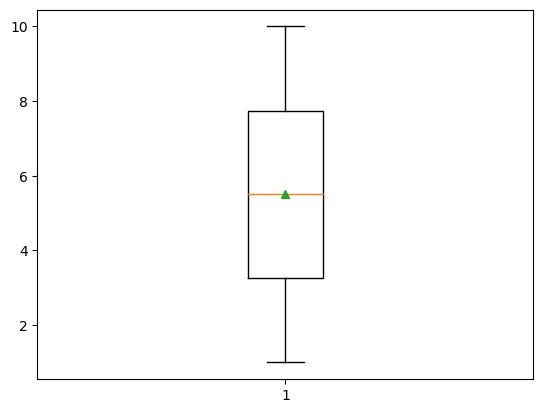

In [14]:
bp = plt.boxplot(dataset['CS'],showmeans=True)

In [15]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [5.5]
Means: [5.500258810905877]
Minimums: [1.0]
Maximums: [10.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
     5.5  5.50026          1         10


In [16]:
skewness = dataset['CS'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: 6.178125748848859e-05


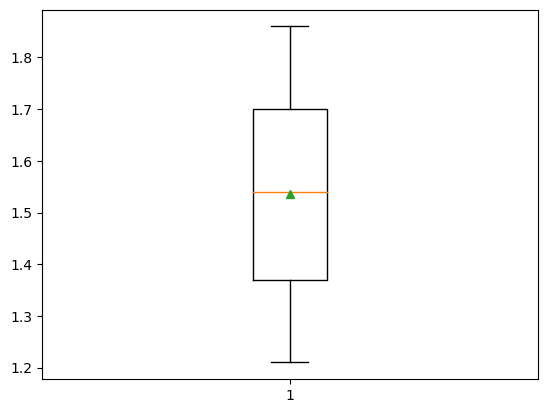

In [17]:
bp = plt.boxplot(dataset['Density'],showmeans=True)

In [18]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [1.54]
Means: [1.5355225229222722]
Minimums: [1.2]
Maximums: [1.9]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
    1.54  1.53552        1.2        1.9


In [19]:
skewness = dataset['Density'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.000804598333213024


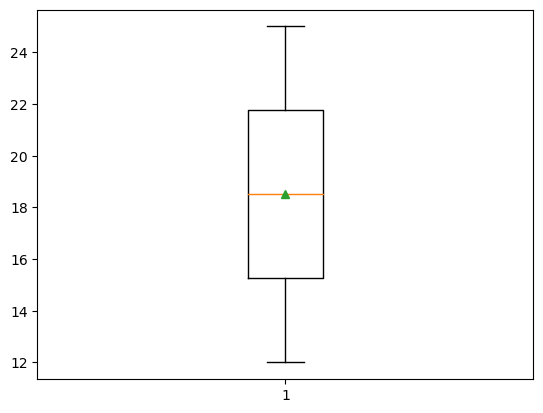

In [20]:
bp = plt.boxplot(dataset['WC'],showmeans=True)

In [21]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [18.51]
Means: [18.502625381701712]
Minimums: [12.0]
Maximums: [25.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
   18.51  18.5026         12         25


In [22]:
skewness = dataset['WC'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.0028230368254291978


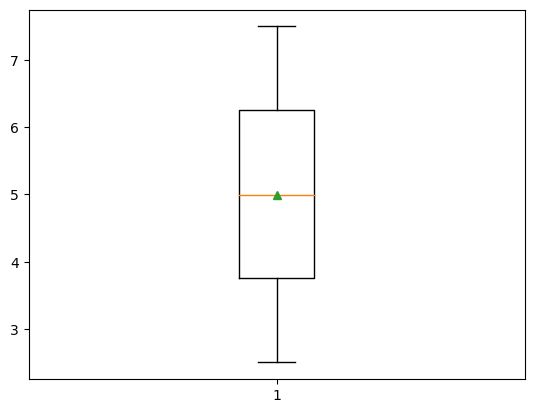

In [23]:
bp = plt.boxplot(dataset['pH'],showmeans=True)

In [24]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [4.99]
Means: [4.996047405638495]
Minimums: [2.5]
Maximums: [7.5]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
    4.99  4.99605        2.5        7.5


In [25]:
skewness = dataset['pH'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: 0.0028433657611426854


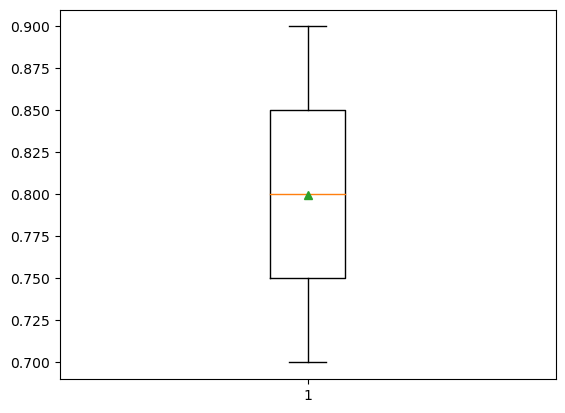

In [26]:
bp = plt.boxplot(dataset['EC'],showmeans=True)

In [27]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [0.8]
Means: [0.7999739817589946]
Minimums: [0.7]
Maximums: [0.9]


  Median      Mean    Minimum    Maximum
--------  --------  ---------  ---------
     0.8  0.799974        0.7        0.9


In [28]:
skewness = dataset['EC'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: 0.0008038187121979974


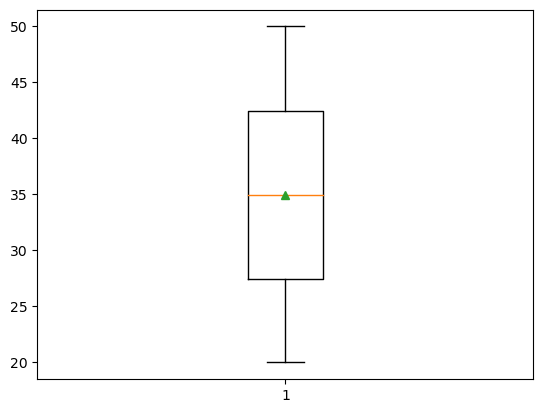

In [29]:
bp = plt.boxplot(dataset['F'],showmeans=True)

In [30]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [34.97]
Means: [34.97057288536242]
Minimums: [20.0]
Maximums: [50.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
   34.97  34.9706         20         50


In [31]:
skewness = dataset['F'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: 0.0007892588462970137


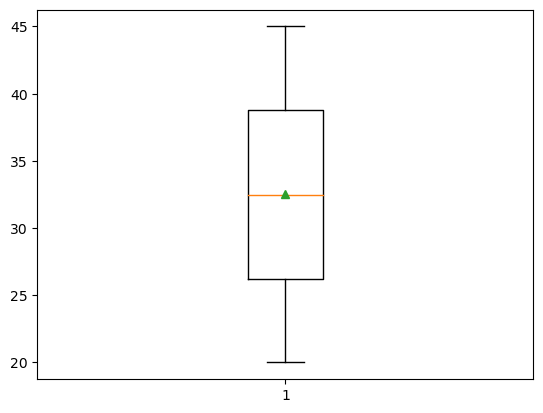

In [32]:
bp = plt.boxplot(dataset['G'],showmeans=True)

In [33]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [32.49]
Means: [32.50100628068236]
Minimums: [20.0]
Maximums: [45.0]


  Median    Mean    Minimum    Maximum
--------  ------  ---------  ---------
   32.49  32.501         20         45


In [34]:
skewness = dataset['G'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.0003145659003590973


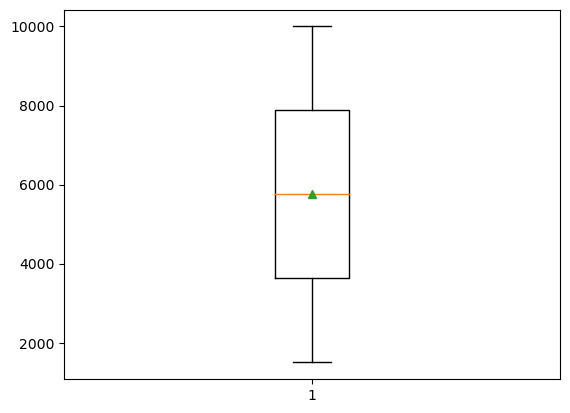

In [35]:
bp = plt.boxplot(dataset['Viscosity'],showmeans=True)

In [36]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [5753.77]
Means: [5752.893888335358]
Minimums: [1500.0]
Maximums: [10000.0]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
 5753.77  5752.89       1500      10000


In [37]:
skewness = dataset['Viscosity'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.0038507210994315876


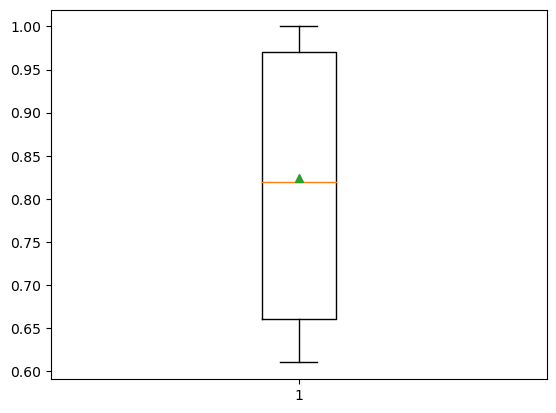

In [38]:
bp = plt.boxplot(dataset['Purity'],showmeans=True)

In [39]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [0.82]
Means: [0.8244711439554988]
Minimums: [0.6]
Maximums: [1.0]


  Median      Mean    Minimum    Maximum
--------  --------  ---------  ---------
    0.82  0.824471        0.6          1


In [40]:
skewness = dataset['Purity'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.07179123782594664


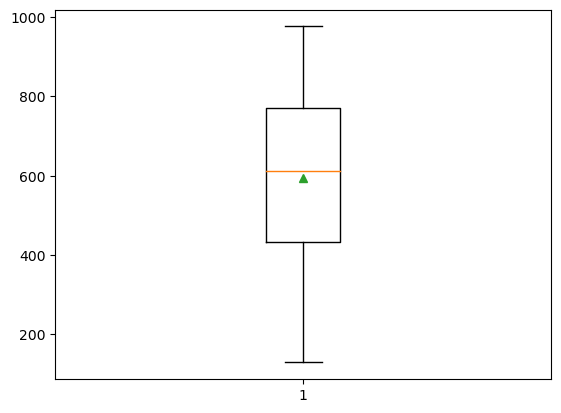

In [41]:
bp = plt.boxplot(dataset['Price'],showmeans=True)

In [42]:
extract_boxplot_values(bp)

Exact values from boxplot:

Medians: [612.96]
Means: [594.8076444415758]
Minimums: [128.7]
Maximums: [976.7]


  Median     Mean    Minimum    Maximum
--------  -------  ---------  ---------
  612.96  594.808      128.7      976.7


In [43]:
skewness = dataset['Price'].skew()
print(f"Skewness coefficient: {skewness}")

Skewness coefficient: -0.24470189786485724


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot_by_category(data, category_col, value_col, plot_title=None, x_label=None, y_label=None):
    """
    Generates a boxplot for values distributed across different categories.

    Parameters:
    - data: DataFrame containing the data.
    - category_col: Name of the column representing the categories.
    - value_col: Name of the column representing the values to be plotted.
    - plot_title: Title of the plot (optional, dynamically generated if not provided).
    - x_label: Label for the X-axis (optional, dynamically generated if not provided).
    - y_label: Label for the Y-axis (optional, dynamically generated if not provided).
    """
    # Dynamically generate title and labels if not provided
    if not plot_title:
        plot_title = f'Boxplot of {value_col} by {category_col}'
    if not x_label:
        x_label = category_col
    if not y_label:
        y_label = value_col

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=category_col, y=value_col, data=data)
    plt.title(plot_title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)  # Adjust as needed to make category labels readable
    plt.show()

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'Density', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'WC', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'pH', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'EC', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'F', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'G', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'Viscosity', plot_title=None, x_label=None, y_label=None)

In [ ]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'Purity', plot_title=None, x_label=None, y_label=None)

In [1]:
plot_boxplot_by_category(dataset, 'Pollen_analysis', 'Price', plot_title=None, x_label=None, y_label=None)

NameError: name 'plot_boxplot_by_category' is not defined